#cellphone reviews at ...
#data at http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz


In [1]:
import json
import pandas as pd
import gzip



In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)


In [3]:
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


In [4]:
dfraw = getDF('./data/cell_reviews_5core.json.gz')


In [5]:
trial=5000

#subset for local runs, will remove on final runs or on server
five=(dfraw['overall'] == 5.0)
four=(dfraw['overall'] >= 4.0) & (dfraw['overall'] < 5.0)
three=(dfraw['overall'] == 3.0) & (dfraw['overall'] < 4.0)
two=(dfraw['overall'] == 2.0) & (dfraw['overall'] < 3.0)
one=(dfraw['overall'] == 1.0) & (dfraw['overall'] < 2.0)
zero=(dfraw['overall'] == 0.0) & (dfraw['overall'] < 1.0)

df=dfraw[five].iloc[0:trial]
df=df.append(dfraw[four].iloc[0:trial])
df=df.append(dfraw[three].iloc[0:trial])
df=df.append(dfraw[two].iloc[0:trial])
df=df.append(dfraw[one].iloc[0:trial])
df=df.append(dfraw[zero].iloc[0:trial])

len(df)

25000

In [6]:
#convert review date to standard format
df['Review_Time']= pd.to_datetime(df['reviewTime'])
df['Month']=df['Review_Time'].dt.month
df['Year']=df['Review_Time'].dt.year




In [7]:
# take a peek at the data
df.head()



,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Review_Time,Month,Year
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,2014-08-04,8,2014
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,2014-02-12,2,2014
7,5.0,True,"01 17, 2014",A31OVFL91BCKXG,7508492919,NaN,Ashley Nicole Miller,It is a very cute case. None of the jewels hav...,Cute case,1389916800,NaN,NaN,2014-01-17,1,2014
11,5.0,True,"10 23, 2013",A2ZB7KGUSBR9P3,7508492919,NaN,E. Bryce,Another great product that my daughter she use...,Bling bling for iPhone 4S,1382486400,NaN,NaN,2013-10-23,10,2013
14,5.0,True,"09 10, 2013",A18U23JWTMQX5C,7508492919,NaN,KaitlynxO625,Beautiful quality and outstanding product! Eve...,I can't stop using this case!,1378771200,NaN,NaN,2013-09-10,9,2013


In [8]:
# take a peek at the data
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 52074
Data columns (total 15 columns):
overall           25000 non-null float64
verified          25000 non-null bool
reviewTime        25000 non-null object
reviewerID        25000 non-null object
asin              25000 non-null object
style             7265 non-null object
reviewerName      24996 non-null object
reviewText        24999 non-null object
summary           24997 non-null object
unixReviewTime    25000 non-null int64
vote              3910 non-null object
image             181 non-null object
Review_Time       25000 non-null datetime64[ns]
Month             25000 non-null int64
Year              25000 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 2.9+ MB


In [9]:
#count of reviews each year
yearly=df.groupby(['Year'])['reviewerID'].count().reset_index()
#change name of column
yearly=yearly.rename(columns={'reviewerID': 'Number_Of_Reviews'})
yearly

,Year,Number_Of_Reviews
0,2002,2
1,2003,16
2,2004,41
3,2005,127
4,2006,309
5,2007,654
6,2008,1453
7,2009,1665
8,2010,1719
9,2011,2423


In [10]:
#plot number of reviews by year
yearly.plot(x="Year",y="Number_Of_Reviews",kind="line",title="# Reviews by Year")

import matplotlib.pyplot as plt
plt.show()



<Figure size 640x480 with 1 Axes>

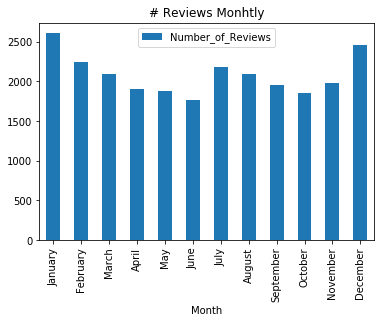

In [11]:
#number of reviews by month
monthly=df.groupby(['Month'])['reviewerID'].count().reset_index()
# Replacing digits of 'Month' column in 'Monthly' dataframe with words using 'Calendar' library

import calendar
monthly['Month'] = monthly['Month'].apply(lambda x: calendar.month_name[x])
monthly=monthly.rename(columns={'reviewerID':'Number_of_Reviews'})
monthly
#barplot
monthly.plot(x="Month",y="Number_of_Reviews",kind="bar",title="# Reviews Monhtly")
plt.show()
